 # Austin Animal Center Shelter
 
 Analiza podataka o životinjama u životinjskom centru "Austin Animal Center"
 

### Upoznavanje dataseta

In [2]:
import numpy as np 
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import preprocessing

In [4]:
animal_data =  pd.read_csv('aac_intakes_outcomes.csv')

Dataset ima 79672 instanci:

In [5]:
animal_data.shape

(79672, 41)

In [6]:
pd.set_option('display.max_columns', 41)

In [7]:
animal_data.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,2007,7,2017-12,10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Colony Creek And Hunters Trace in Austin (TX),Normal,Stray,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,2007,7,2014-12,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research Blvd in Austin (TX),Normal,Public Assist,Neutered Male,1,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,3,2014,2014-03,Saturday,17,3.0,2007,7,2014-03,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research in Austin (TX),Normal,Public Assist,Neutered Male,1,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,2004,4,2014-04,10 years,A047759,Dog,Dachshund,Tricolor,Austin (TX),Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,1997,10,2013-11,16 years,A134067,Dog,Shetland Sheepdog,Brown/White,12034 Research Blvd in Austin (TX),Injured,Public Assist,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [8]:
animal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_upon_outcome            79672 non-null  object 
 1   animal_id_outcome           79672 non-null  object 
 2   date_of_birth               79672 non-null  object 
 3   outcome_subtype             36348 non-null  object 
 4   outcome_type                79662 non-null  object 
 5   sex_upon_outcome            79671 non-null  object 
 6   age_upon_outcome_(days)     79672 non-null  int64  
 7   age_upon_outcome_(years)    79672 non-null  float64
 8   age_upon_outcome_age_group  79672 non-null  object 
 9   outcome_datetime            79672 non-null  object 
 10  outcome_month               79672 non-null  int64  
 11  outcome_year                79672 non-null  int64  
 12  outcome_monthyear           79672 non-null  object 
 13  outcome_weekday             796

In [9]:
animal_data.describe()

,age_upon_outcome_(days),age_upon_outcome_(years),outcome_month,outcome_year,outcome_hour,outcome_number,dob_year,dob_month,count,age_upon_intake_(days),age_upon_intake_(years),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days
count,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.0,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000
mean,782.046127,2.142592,6.655425,2015.472563,14.297306,1.126820,2013.254870,6.310310,1.0,769.341701,2.107785,6.584032,2015.436101,13.487022,1.126820,16.757116
std,1058.528519,2.900078,3.414284,1.305944,3.774317,0.456057,3.216517,3.289077,0.0,1056.009040,2.893175,3.366579,1.303157,3.121173,0.456057,41.679359
min,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,1991.000000,1.000000,1.0,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,0.000000
25%,90.000000,0.246575,4.000000,2014.000000,12.000000,1.000000,2012.000000,4.000000,1.0,60.000000,0.164384,4.000000,2014.000000,11.000000,1.000000,1.102083
50%,365.000000,1.000000,7.000000,2015.000000,15.000000,1.000000,2014.000000,6.000000,1.0,365.000000,1.000000,7.000000,2015.000000,13.000000,1.000000,4.987153
75%,1095.000000,3.000000,10.000000,2017.000000,17.000000,1.000000,2015.000000,9.000000,1.0,1095.000000,3.000000,10.000000,2017.000000,16.000000,1.000000,13.610764
max,9125.000000,25.000000,12.000000,2018.000000,23.000000,13.000000,2018.000000,12.000000,1.0,9125.000000,25.000000,12.000000,2018.000000,23.000000,13.000000,1606.194444


In [10]:
animal_data.max()

age_upon_outcome                                          9 years
animal_id_outcome                                         A769067
date_of_birth                                 2018-03-25 00:00:00
age_upon_outcome_(days)                                      9125
age_upon_outcome_(years)                                       25
age_upon_outcome_age_group                            (7.5, 10.0]
outcome_datetime                              2018-04-03 18:43:00
outcome_month                                                  12
outcome_year                                                 2018
outcome_monthyear                                         2018-04
outcome_weekday                                         Wednesday
outcome_hour                                                   23
outcome_number                                                 13
dob_year                                                     2018
dob_month                                                      12
dob_monthy

Duplikati:

In [11]:
animal_data.drop_duplicates(subset='animal_id_outcome', keep='first', inplace=True)

In [12]:
animal_data.shape

(71961, 41)

In [13]:
79672 - 71961

7711

Postoji 7711 duplikata

Broj razlčitih vrsta životinja:
    

In [14]:
animal_data.groupby('animal_type')['animal_id_outcome'].count()

animal_type
Bird       339
Cat      28303
Dog      38909
Other     4410
Name: animal_id_outcome, dtype: int64

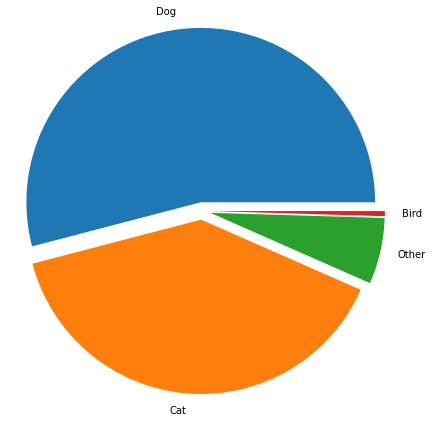

In [15]:
plt.figure(figsize=(6,6))
animal_type = animal_data['animal_type'].value_counts()
explode = (0.05, 0.05, 0.05, 0.05) 
# Plot
plt.pie(animal_type.values, explode=explode, labels=animal_type.index)
plt.axis('equal')
plt.tight_layout()
plt.show()

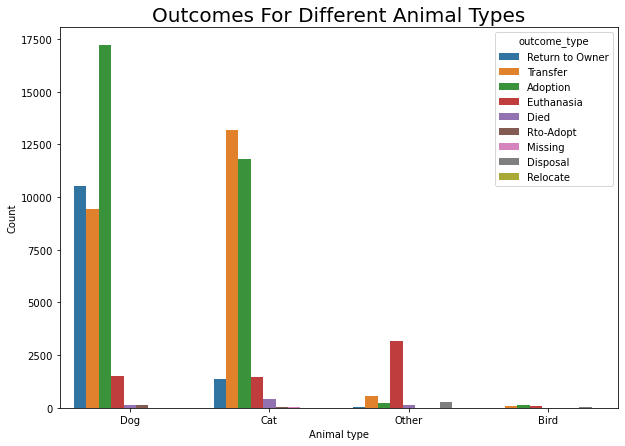

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(data = animal_data, x='animal_type', hue='outcome_type')
plt.title('Outcomes For Different Animal Types', fontsize=20)
plt.xlabel("Animal type")
plt.ylabel("Count")
plt.show()

Odnos starosti životinje i broja životinja u skloništu:

In [17]:
animal_age_intake = animal_data['age_upon_intake'].value_counts().head(15)

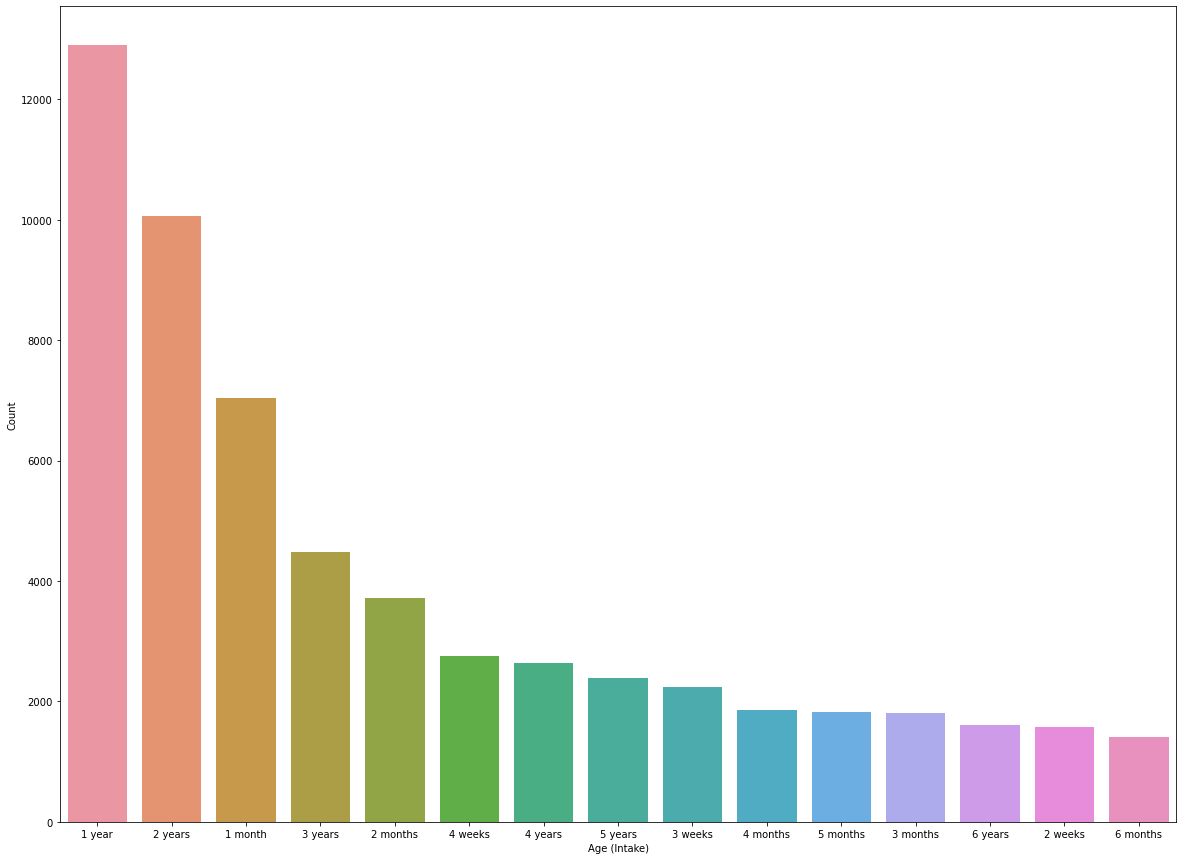

In [18]:
plt.figure(figsize=(20,15))
sns.barplot(x = animal_age_intake.index, y = animal_age_intake.values)
plt.xlabel("Age (Intake)")
plt.ylabel("Count")
plt.show()

Odnos starosti životinje i broja životinja koje su puštene iz skloništa:

In [19]:
animal_age_outcome = animal_data['age_upon_outcome'].value_counts().head(15)

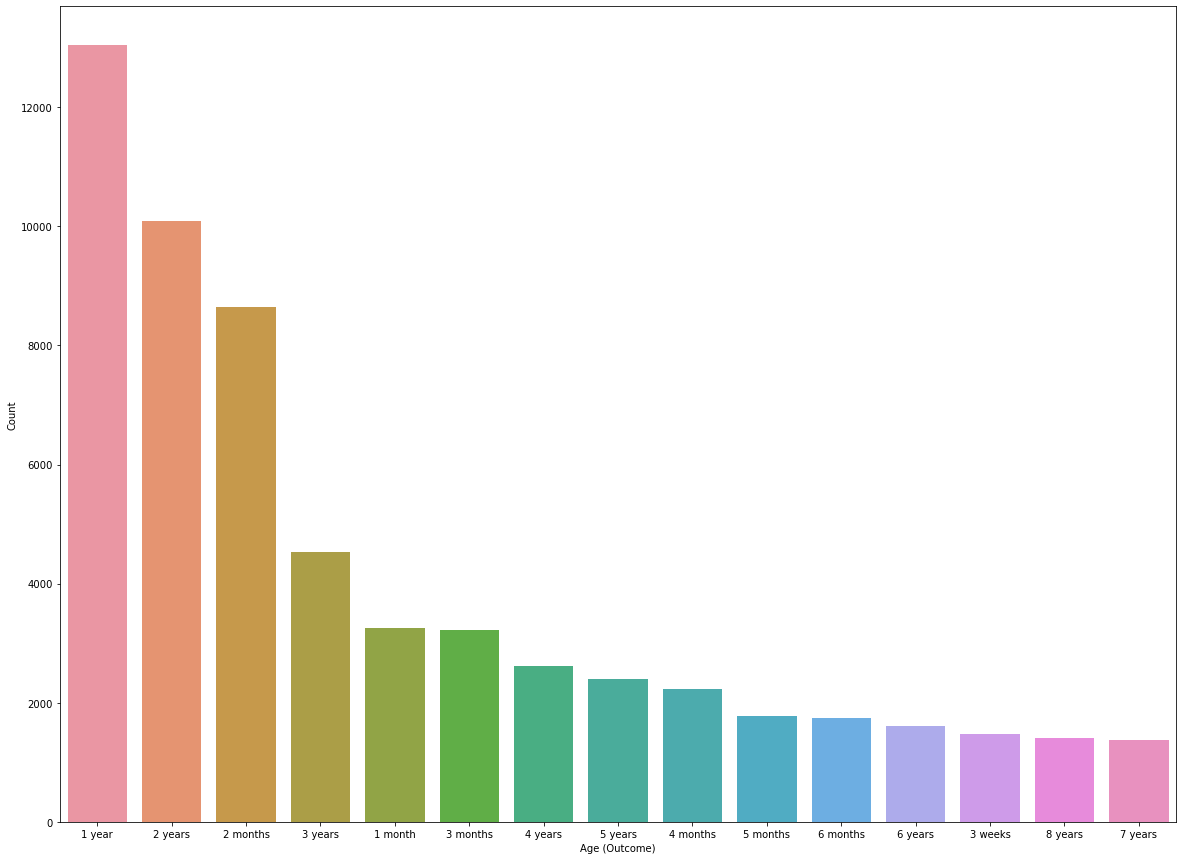

In [20]:
plt.figure(figsize=(20,15))
sns.barplot(x = animal_age_outcome.index, y = animal_age_outcome.values)
plt.xlabel("Age (Outcome)")
plt.ylabel("Count")
plt.show()

Odnos vrste životinja i starosti životinja:

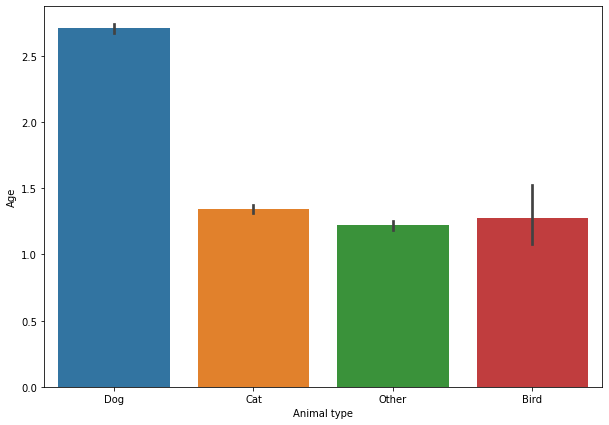

In [21]:
plt.figure(figsize=(10,7))
sns.barplot(x = animal_data['animal_type'], y = animal_data['age_upon_intake_(years)'])
plt.xlabel("Animal type")
plt.ylabel("Age")
plt.show()

Text(0, 0.5, 'Age (Years)')

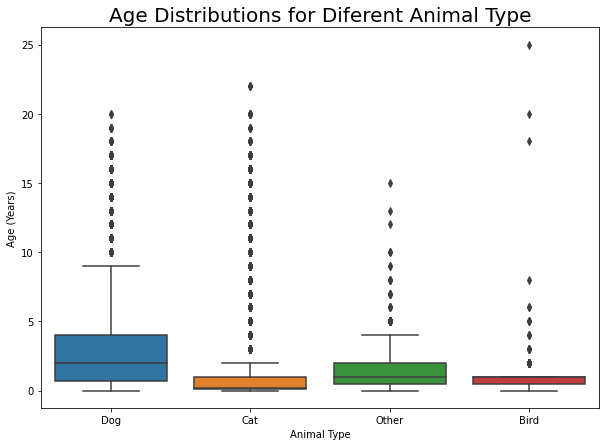

In [22]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='animal_type', y='age_upon_intake_(years)', data=animal_data, orient='v')
plt.title('Age Distributions for Diferent Animal Type', fontsize=20)
plt.xlabel('Animal Type')
plt.ylabel('Age (Years)')

Rasa životinja:

In [23]:
animal_data['intake_type'].value_counts()

Stray                 50514
Owner Surrender       13441
Public Assist          4304
Wildlife               3457
Euthanasia Request      245
Name: intake_type, dtype: int64

In [24]:
strays = animal_data[animal_data['intake_type'] == 'Stray']
owner_surrender = animal_data[animal_data['intake_type'] == 'Owner Surrender']
public_assist = animal_data[animal_data['intake_type'] == 'Public Assist']
wildlife = animal_data[animal_data['intake_type'] == 'Wildlife']
euthanasia = animal_data[animal_data['intake_type'] == 'Euthanasia Request']

In [25]:
strays['breed'].value_counts().head(20)

Domestic Shorthair Mix       17852
Pit Bull Mix                  3299
Chihuahua Shorthair Mix       3161
Labrador Retriever Mix        3088
Domestic Medium Hair Mix      1775
German Shepherd Mix           1181
Domestic Longhair Mix          887
Siamese Mix                    725
Australian Cattle Dog Mix      676
Dachshund Mix                  541
Miniature Poodle Mix           453
Boxer Mix                      392
Border Collie Mix              369
Rat Terrier Mix                309
Yorkshire Terrier Mix          304
Australian Shepherd Mix        295
Jack Russell Terrier Mix       288
Siberian Husky Mix             286
Miniature Schnauzer Mix        281
Catahoula Mix                  271
Name: breed, dtype: int64

In [26]:
owner_surrender['breed'].value_counts().head(20)

Domestic Shorthair Mix       4113
Pit Bull Mix                  954
Chihuahua Shorthair Mix       886
Labrador Retriever Mix        738
Domestic Medium Hair Mix      398
German Shepherd Mix           320
Domestic Longhair Mix         255
Siamese Mix                   199
Australian Cattle Dog Mix     190
Dachshund Mix                 148
Border Collie Mix             140
Boxer Mix                     120
Domestic Shorthair            104
Catahoula Mix                  94
Australian Shepherd Mix        86
Yorkshire Terrier Mix          80
Guinea Pig Mix                 77
Chihuahua Longhair Mix         70
Jack Russell Terrier Mix       70
Rabbit Sh Mix                  70
Name: breed, dtype: int64

In [27]:
public_assist['breed'].value_counts().head(20)

Pit Bull Mix                 690
Domestic Shorthair Mix       458
Chihuahua Shorthair Mix      345
Labrador Retriever Mix       297
German Shepherd Mix          139
Australian Cattle Dog Mix     86
Dachshund Mix                 58
Chicken Mix                   55
Boxer Mix                     54
Miniature Poodle Mix          52
Border Collie Mix             50
Domestic Medium Hair Mix      50
Domestic Longhair Mix         44
Australian Shepherd Mix       40
Pit Bull                      35
Yorkshire Terrier Mix         34
Bat                           34
American Bulldog Mix          34
Catahoula Mix                 31
Rottweiler Mix                30
Name: breed, dtype: int64

In [28]:
wildlife['breed'].value_counts().head(20)

Bat Mix          1322
Bat               779
Raccoon Mix       445
Raccoon           224
Opossum Mix       165
Opossum           102
Skunk Mix          78
Squirrel Mix       67
Fox Mix            48
Skunk              41
Squirrel           35
Fox                17
Dove Mix           11
Rabbit Sh Mix      11
Turtle Mix         10
Rabbit Sh           8
Pigeon Mix          8
Coyote Mix          8
Armadillo Mix       6
Grackle Mix         6
Name: breed, dtype: int64

In [29]:
euthanasia['breed'].value_counts().head(20)

Domestic Shorthair Mix       37
Pit Bull Mix                 35
Labrador Retriever Mix       24
Chihuahua Shorthair Mix      17
German Shepherd Mix          15
Domestic Medium Hair Mix      7
Domestic Longhair Mix         6
Miniature Poodle Mix          5
Pit Bull                      4
Rottweiler Mix                4
Border Collie Mix             3
Chicken Mix                   3
Jack Russell Terrier Mix      2
Cocker Spaniel                2
Siamese Mix                   2
Miniature Schnauzer Mix       2
Labrador Retriever/Boxer      2
Australian Shepherd Mix       2
Australian Cattle Dog Mix     2
Ferret                        2
Name: breed, dtype: int64

In [30]:
stray_animals = strays['breed'].value_counts().head(10)

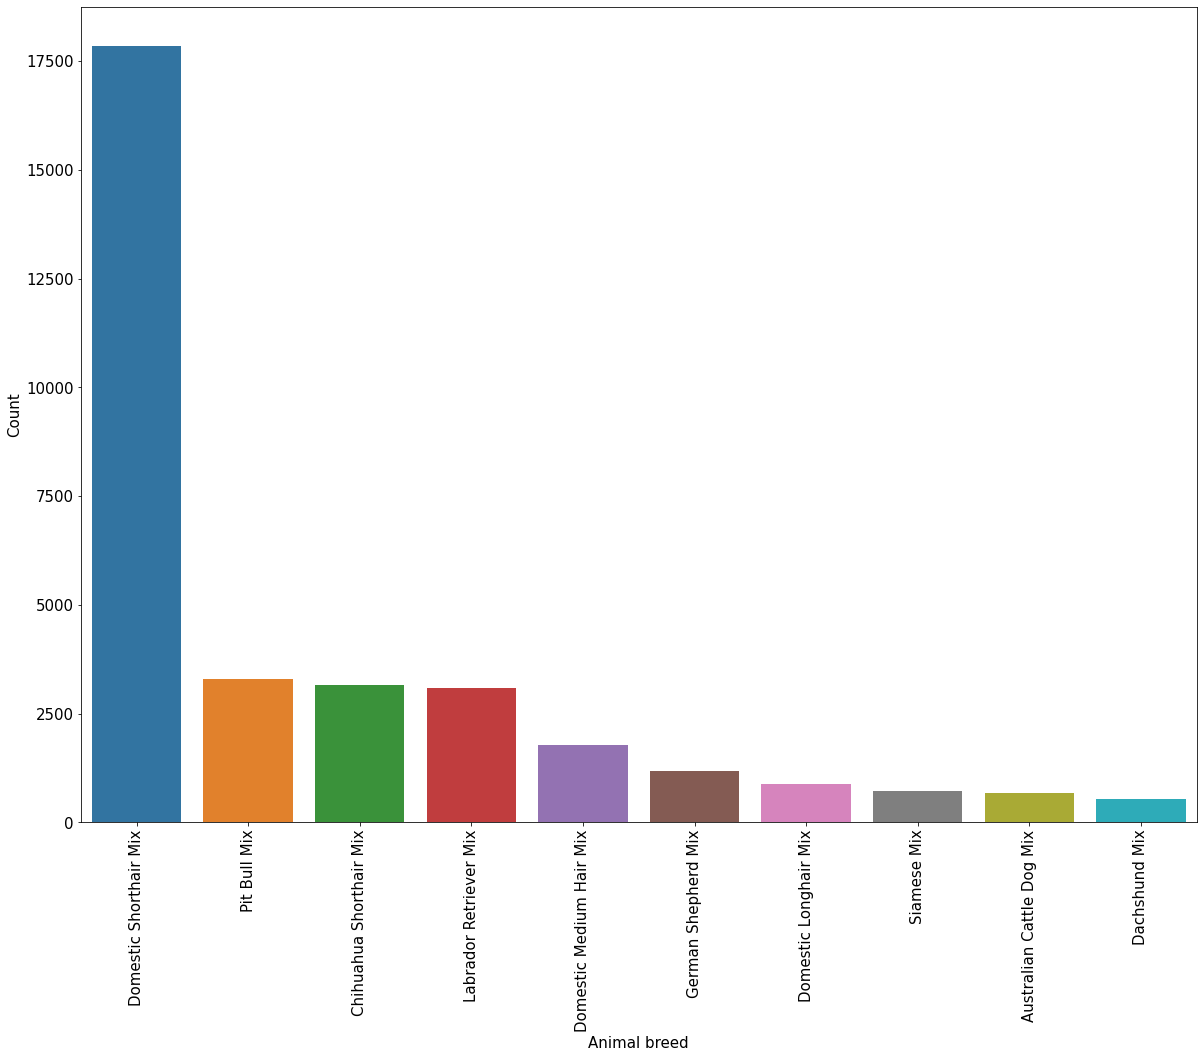

In [31]:
plt.figure(figsize=(20,15))
sns.barplot(x = stray_animals.index, y = stray_animals.values)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Animal breed", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [32]:
animal_data['outcome_type'].value_counts()

Adoption           29332
Transfer           23254
Return to Owner    11937
Euthanasia          6234
Died                 690
Disposal             301
Rto-Adopt            151
Missing               41
Relocate              15
Name: outcome_type, dtype: int64

In [33]:
adoption_outcome = animal_data[animal_data['outcome_type'] == 'Adoption']['breed'].value_counts().head(20)
return_owner_outcome = animal_data[animal_data['outcome_type'] == 'Return to Owner']['breed'].value_counts().head(20)
euthanasia_outcome = animal_data[animal_data['outcome_type'] == 'Euthanasia']['breed'].value_counts().head(20)

In [34]:
euthanasia_outcome.head(20)

Bat Mix                      1197
Domestic Shorthair Mix       1135
Bat                           728
Raccoon Mix                   443
Pit Bull Mix                  426
Raccoon                       215
Chihuahua Shorthair Mix       152
Opossum Mix                   149
Domestic Medium Hair Mix      139
Labrador Retriever Mix        118
Opossum                        95
Domestic Longhair Mix          85
Skunk Mix                      75
Squirrel Mix                   68
Siamese Mix                    57
German Shepherd Mix            52
Fox Mix                        42
Skunk                          40
Squirrel                       34
Australian Cattle Dog Mix      29
Name: breed, dtype: int64

In [35]:
adoption_outcome.head(20)

Domestic Shorthair Mix       9190
Chihuahua Shorthair Mix      2021
Labrador Retriever Mix       2013
Pit Bull Mix                 1786
Domestic Medium Hair Mix      977
German Shepherd Mix           755
Domestic Longhair Mix         536
Australian Cattle Dog Mix     504
Siamese Mix                   418
Dachshund Mix                 349
Border Collie Mix             292
Boxer Mix                     246
Miniature Poodle Mix          241
Catahoula Mix                 205
Australian Shepherd Mix       196
Cairn Terrier Mix             188
Jack Russell Terrier Mix      186
Rat Terrier Mix               174
Chihuahua Longhair Mix        169
Domestic Shorthair            167
Name: breed, dtype: int64

In [36]:
return_owner_outcome.head(20)

Pit Bull Mix                 1544
Chihuahua Shorthair Mix      1017
Labrador Retriever Mix        985
Domestic Shorthair Mix        972
German Shepherd Mix           470
Australian Cattle Dog Mix     213
Miniature Poodle Mix          192
Dachshund Mix                 181
Boxer Mix                     161
Siberian Husky Mix            155
Border Collie Mix             138
Yorkshire Terrier Mix         133
Australian Shepherd Mix       122
Miniature Schnauzer Mix       120
Rat Terrier Mix               107
Domestic Longhair Mix         100
Shih Tzu Mix                   98
Rottweiler Mix                 97
Domestic Medium Hair Mix       96
Jack Russell Terrier Mix       94
Name: breed, dtype: int64

[Text(0.5, 0, 'Euthanasia COunt')]

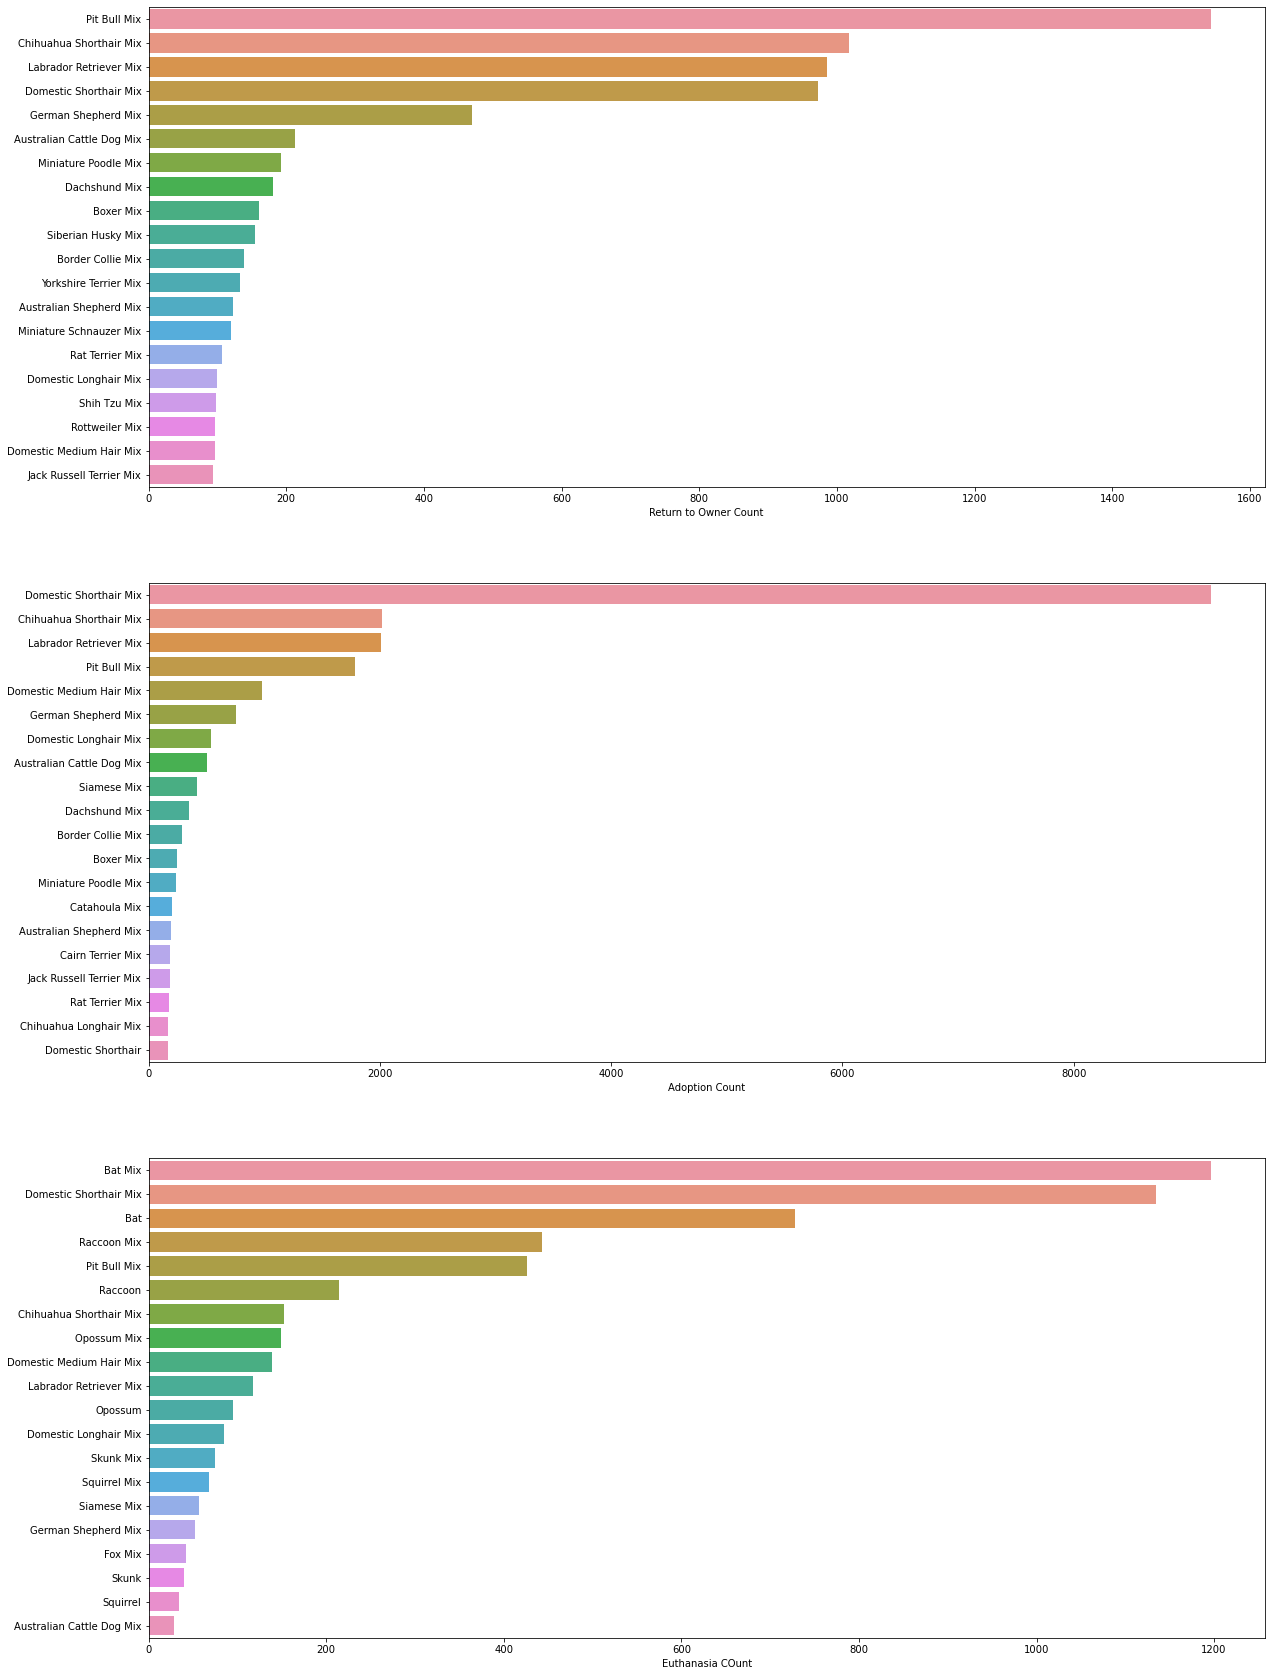

In [37]:
outcome_fig, axis = plt.subplots(3, 1, figsize = (20, 30))

return_owner_outcome_fig = sns.barplot(y = return_owner_outcome.index, x = return_owner_outcome.values, ax = axis[0])
return_owner_outcome_fig.set(xlabel = 'Return to Owner Count')

adoption_outcome_fig = sns.barplot(y = adoption_outcome.index, x = adoption_outcome.values, ax = axis[1])
adoption_outcome_fig.set(xlabel = 'Adoption Count')

euthanasia_outcome_fig = sns.barplot(y = euthanasia_outcome.index, x = euthanasia_outcome.values, ax = axis[2])
euthanasia_outcome_fig.set(xlabel = 'Euthanasia COunt')

Primećuje se je eutanazija česta kod divljih životinja. Može se proveriti ishod za životinje kod kojih je 'animal_type' = 'Other'.

In [38]:
other_data = animal_data[animal_data['animal_type']=='Other']

In [39]:
other_data['breed'].unique()

array(['Rabbit Sh Mix', 'Bat Mix', 'Raccoon Mix', 'Skunk', 'Raccoon',
       'Opossum Mix', 'Bat', 'Ferret', 'Californian Mix', 'Skunk Mix',
       'Rabbit Sh', 'Fox Mix', 'Opossum', 'Armadillo Mix', 'Squirrel Mix',
       'Guinea Pig Mix', 'Rabbit Sh/Lop-Mini', 'Fox', 'Turtle Mix',
       'Rex Mix', 'Guinea Pig', 'Squirrel', 'Rat', 'Rat Mix',
       'Californian', 'Coyote Mix', 'Hamster Mix', 'English Spot Mix',
       'Lionhead Mix', 'Ferret Mix', 'Silver Mix', 'Tortoise Mix',
       'Sugar Glider', 'Dutch Mix', 'Jersey Wooly Mix', 'Cottontail Mix',
       'Lop-English Mix', 'Armadillo', 'Cold Water', 'American Mix',
       'Lop-Holland Mix', 'Rabbit Lh Mix', 'Lionhead', 'Snake',
       'Dutch/Rabbit Sh', 'Snake Mix', 'Lizard Mix', 'American Sable',
       'New Zealand Wht Mix', 'Lop-Mini Mix', 'Mouse Mix', 'Hotot Mix',
       'Hamster', 'Cinnamon', 'Rabbit Lh', 'American Sable Mix',
       'Gerbil Mix', 'Angora-French Mix', 'Dutch', 'Tarantula', 'Turtle',
       'Frog', 'Snake/Snake

In [40]:
other_group = other_data.groupby(['outcome_type'])[['count']].sum().reset_index().sort_values(by='count', ascending=False)
names = other_group['outcome_type']
size_of_groups = other_group['count']

Text(0.5, 1.0, 'Outcome - Other Animal Type')

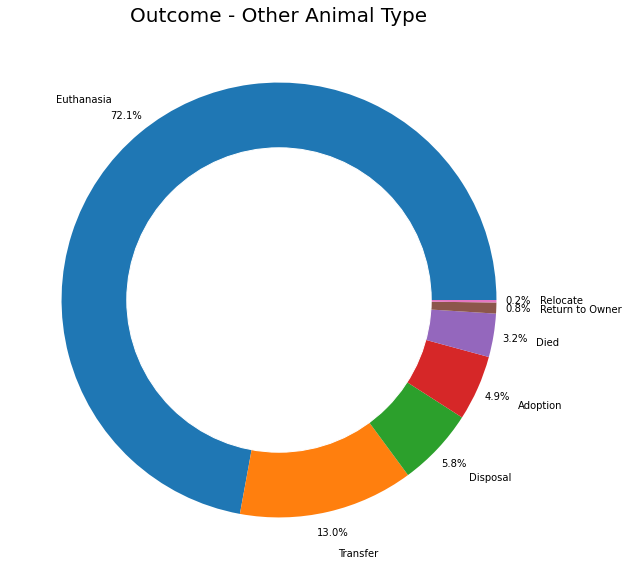

In [41]:
plt.figure(figsize=(15, 10))
plt.pie(size_of_groups, labels=names, autopct='%1.1f%%' , pctdistance=1.1, labeldistance=1.2)
my_circle = plt.Circle( (0,0), 0.7, color='white') # add a circle at the center
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Outcome - Other Animal Type', fontsize=20)

Analiza stanja životinja:

In [42]:
intake_condition = animal_data['intake_condition'].value_counts()

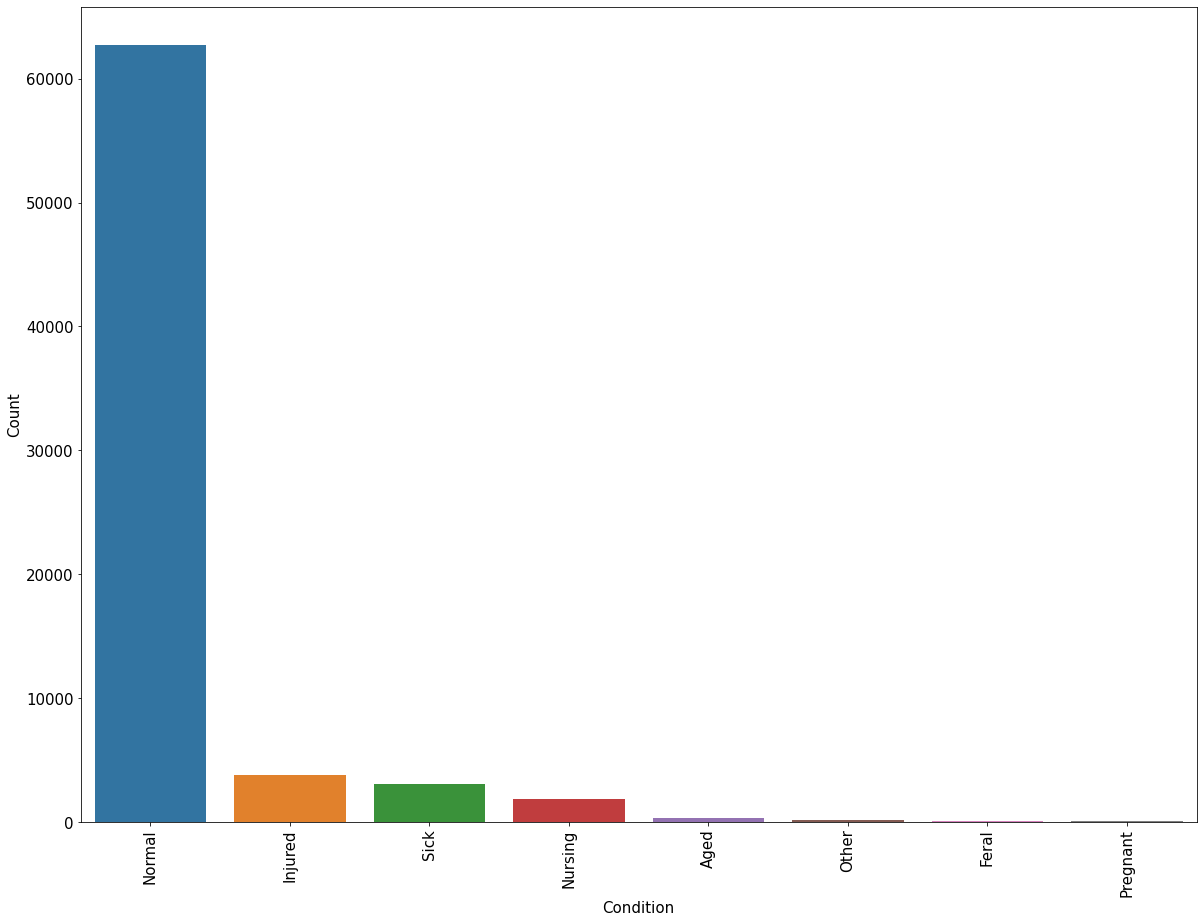

In [43]:
plt.figure(figsize=(20,15))
sns.barplot(x = intake_condition.index, y = intake_condition.values)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Condition", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

Analiza datuma:

Text(0, 0.5, 'Count of Intakes')

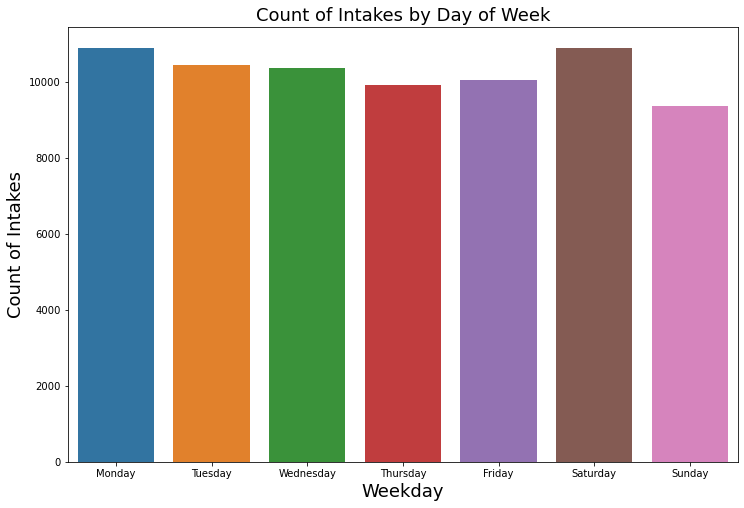

In [44]:
# Order the weekdays starting from Monday
animal_data['intake_weekday'] = pd.Categorical(animal_data['intake_weekday'], ordered=True,
                                      categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(12, 8))
sns.countplot(x='intake_weekday', data=animal_data, orient='v')
plt.title('Count of Intakes by Day of Week', fontsize=18)
plt.xlabel('Weekday', fontsize=18)
plt.ylabel('Count of Intakes', fontsize=18)

Text(0, 0.5, 'Count of Intakes')

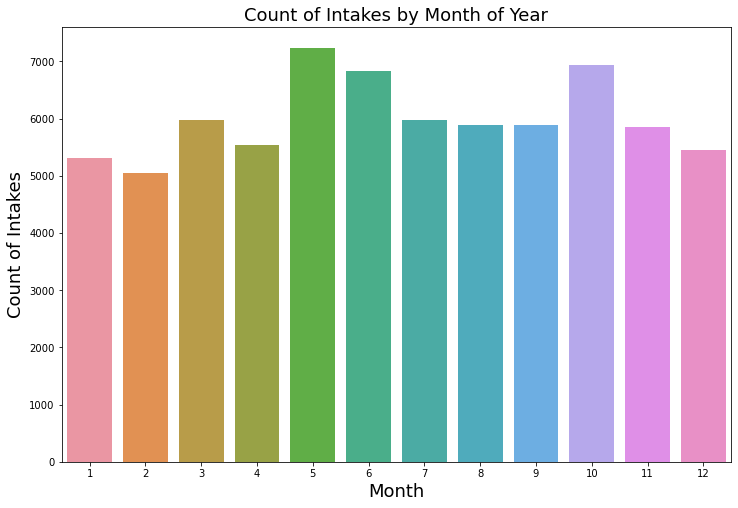

In [45]:
plt.figure(figsize=(12, 8))
sns.countplot(x='intake_month', data=animal_data, orient='v')
plt.title('Count of Intakes by Month of Year', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Count of Intakes', fontsize=18)

## Klasterizacija

### Priprema dataseta:

Da li postoje vrednosti koje nedostaju:

In [46]:
animal_data.isnull().sum()

age_upon_outcome                  0
animal_id_outcome                 0
date_of_birth                     0
outcome_subtype               36505
outcome_type                      6
sex_upon_outcome                  1
age_upon_outcome_(days)           0
age_upon_outcome_(years)          0
age_upon_outcome_age_group        0
outcome_datetime                  0
outcome_month                     0
outcome_year                      0
outcome_monthyear                 0
outcome_weekday                   0
outcome_hour                      0
outcome_number                    0
dob_year                          0
dob_month                         0
dob_monthyear                     0
age_upon_intake                   0
animal_id_intake                  0
animal_type                       0
breed                             0
color                             0
found_location                    0
intake_condition                  0
intake_type                       0
sex_upon_intake             

Za više od polovine podataka nedostaje kolona 'outcome_subtype'.

In [47]:
animal_data.groupby('outcome_type').outcome_subtype.unique().reset_index()

,outcome_type,outcome_subtype
0,Adoption,"[Foster, nan, Offsite, Barn]"
1,Died,"[In Kennel, In Foster, Enroute, At Vet, nan, I..."
2,Disposal,[nan]
3,Euthanasia,"[Suffering, Medical, Behavior, Aggressive, Rab..."
4,Missing,"[In Foster, nan, Possible Theft, In Kennel]"
5,Relocate,[nan]
6,Return to Owner,[nan]
7,Rto-Adopt,[nan]
8,Transfer,"[Partner, Snr, SCRP, Barn]"


Iz kolone 'outcome_type' imamo dovoljno podataka o ishodu. Možemo da uklonimo 'outcome_subtype':

In [48]:
animal_data = animal_data.drop(['outcome_subtype'], axis = 1)

In [49]:
animal_data.shape

(71961, 40)

Postoji jedna kolona gde nedostaje 'sex_upon_outcome' i jedna gde nedostaje 'sex_upon_intake'. Ovo je verovatno ista kolona:

In [50]:
animal_data[animal_data['sex_upon_outcome'].isnull()]

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
6523,7 years,A667395,2006-11-17 00:00:00,Return to Owner,NaN,2555,7.0,"(5.0, 7.5]",2013-11-27 16:11:00,11,2013,2013-11,Wednesday,16,1.0,2006,11,2013-11,7 years,A667395,Dog,Dachshund,Brown Merle,Pflugerville (TX),Normal,Owner Surrender,NaN,1,2555,7.0,"(5.0, 7.5]",2013-11-17 13:15:00,11,2013,2013-11,Sunday,13,1.0,10 days 02:56:00.000000000,10.122222


Možemo da dodelimo neku vrednost za ovu kolonu. Postojeće vrednosti su:

In [51]:
animal_data['sex_upon_outcome'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Female', 'Intact Male',
       'Unknown', nan], dtype=object)

Imamo opciju 'Unknown' koju možemo da iskoristimo:

In [52]:
animal_data.loc[animal_data['sex_upon_outcome'].isnull(), 'sex_upon_outcome']='Unknown'
animal_data.loc[animal_data['sex_upon_intake'].isnull(), 'sex_upon_intake']='Unknown'

In [53]:
animal_data[animal_data['animal_id_outcome'] == 'A667395']

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
6523,7 years,A667395,2006-11-17 00:00:00,Return to Owner,Unknown,2555,7.0,"(5.0, 7.5]",2013-11-27 16:11:00,11,2013,2013-11,Wednesday,16,1.0,2006,11,2013-11,7 years,A667395,Dog,Dachshund,Brown Merle,Pflugerville (TX),Normal,Owner Surrender,Unknown,1,2555,7.0,"(5.0, 7.5]",2013-11-17 13:15:00,11,2013,2013-11,Sunday,13,1.0,10 days 02:56:00.000000000,10.122222


Postoji 6 kolona gde nedostaje 'outcome_type':

In [54]:
animal_data[animal_data['outcome_type'].isnull()]

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
9016,1 year,A671017,2013-01-17 00:00:00,NaN,Unknown,365,1.000000,"(-0.025, 2.5]",2014-01-20 08:27:00,1,2014,2014-01,Monday,8,1.0,2013,1,2014-01,1 year,A671017,Other,Fox Mix,Brown/Black,10105 Falcon Ridge Dr. in Travis (TX),Sick,Wildlife,Unknown,1,365,1.000000,"(-0.025, 2.5]",2014-01-17 12:46:00,1,2014,2014-01,Friday,12,1.0,2 days 19:41:00.000000000,2.820139
11057,0 years,A674209,2014-03-09 00:00:00,NaN,Unknown,0,0.000000,"(-0.025, 2.5]",2014-03-09 18:15:00,3,2014,2014-03,Sunday,18,1.0,2014,3,2014-03,0 years,A674209,Other,Bat Mix,Brown,4210 W. Braker in Austin (TX),Normal,Wildlife,Unknown,1,0,0.000000,"(-0.025, 2.5]",2014-03-09 16:38:00,3,2014,2014-03,Sunday,16,1.0,0 days 01:37:00.000000000,0.067361
14583,4 weeks,A679066,2014-04-16 00:00:00,NaN,Unknown,28,0.076712,"(-0.025, 2.5]",2014-05-16 10:58:00,5,2014,2014-05,Friday,0,1.0,2014,4,2014-05,4 weeks,A679066,Other,Rabbit Sh,Brown,Austin (TX),Normal,Wildlife,Unknown,1,28,0.076712,"(-0.025, 2.5]",2014-05-16 00:00:00,5,2014,2014-05,Friday,10,1.0,0 days 10:58:00.000000000,0.456944
20020,1 year,A686025,2013-08-15 00:00:00,NaN,Unknown,365,1.000000,"(-0.025, 2.5]",2014-08-16 08:35:00,8,2014,2014-08,Saturday,8,1.0,2013,8,2014-08,1 year,A686025,Other,Bat Mix,Brown,12901 N Ih 35 #1100 in Austin (TX),Normal,Wildlife,Unknown,1,365,1.000000,"(-0.025, 2.5]",2014-08-15 18:48:00,8,2014,2014-08,Friday,18,1.0,0 days 13:47:00.000000000,0.574306
44097,10 years,A718046,2005-12-20 00:00:00,NaN,Neutered Male,3650,10.000000,"(7.5, 10.0]",2016-03-26 14:22:00,3,2016,2016-03,Saturday,0,1.0,2005,12,2016-03,10 years,A718046,Dog,Chihuahua Longhair Mix,Cream,12601 Bee Caves Pkwy #203 in Travis (TX),Normal,Public Assist,Neutered Male,1,3650,10.000000,"(7.5, 10.0]",2016-03-26 00:00:00,3,2016,2016-03,Saturday,14,1.0,0 days 14:22:00.000000000,0.598611
63150,1 year,A744013,2016-02-21 00:00:00,NaN,Unknown,365,1.000000,"(-0.025, 2.5]",2017-02-24 09:00:00,2,2017,2017-02,Friday,9,1.0,2016,2,2017-02,1 year,A744013,Other,Bat Mix,Black,6600 Casimir Cove in Austin (TX),Normal,Wildlife,Unknown,1,365,1.000000,"(-0.025, 2.5]",2017-02-21 14:29:00,2,2017,2017-02,Tuesday,14,1.0,2 days 18:31:00.000000000,2.771528


Pošto je ukupno samo 6 redova kojima nedostaje 'outcome_type', možemo im dodeliti neke od vrednosti za ovu kolonu:

In [55]:
animal_data['outcome_type'].unique()

array(['Return to Owner', 'Transfer', 'Adoption', 'Euthanasia', 'Died',
       'Rto-Adopt', 'Missing', 'Disposal', nan, 'Relocate'], dtype=object)

Neka to bude 'Relocate':

In [56]:
animal_data.loc[animal_data['outcome_type'].isnull(), 'outcome_type']='Relocate'

Sada ne postoje redovi gde nedostaju vrednosti:

In [57]:
animal_data.isnull().sum()

age_upon_outcome              0
animal_id_outcome             0
date_of_birth                 0
outcome_type                  0
sex_upon_outcome              0
age_upon_outcome_(days)       0
age_upon_outcome_(years)      0
age_upon_outcome_age_group    0
outcome_datetime              0
outcome_month                 0
outcome_year                  0
outcome_monthyear             0
outcome_weekday               0
outcome_hour                  0
outcome_number                0
dob_year                      0
dob_month                     0
dob_monthyear                 0
age_upon_intake               0
animal_id_intake              0
animal_type                   0
breed                         0
color                         0
found_location                0
intake_condition              0
intake_type                   0
sex_upon_intake               0
count                         0
age_upon_intake_(days)        0
age_upon_intake_(years)       0
age_upon_intake_age_group     0
intake_d

Broj jedinstvenih vrednosti za svaku kolonu:

In [58]:
animal_data.nunique()

age_upon_outcome                 46
animal_id_outcome             71961
date_of_birth                  5923
outcome_type                      9
sex_upon_outcome                  5
age_upon_outcome_(days)          45
age_upon_outcome_(years)         45
age_upon_outcome_age_group       10
outcome_datetime              59079
outcome_month                    12
outcome_year                      6
outcome_monthyear                55
outcome_weekday                   7
outcome_hour                     24
outcome_number                    1
dob_year                         28
dob_month                        12
dob_monthyear                    55
age_upon_intake                  46
animal_id_intake              71961
animal_type                       4
breed                          2155
color                           529
found_location                33422
intake_condition                  8
intake_type                       5
sex_upon_intake                   5
count                       

'count' je pomoćna kolona za tabelarno izračunavanje broja. Svi redovi u ovoj koloni su 1. Ovu kolonu možemo ukloniti.  
Takođje animal_id_intake i animal_id_outcome predsavljaju jedinstveni broj životinje u skolištu, ali nam neće pomoći kod klasterizacije, tako da možemo ukloniti ove kolone.

In [59]:
animal_data = animal_data.drop(['count'], axis = 1)
animal_data = animal_data.drop(['animal_id_intake'], axis = 1)
animal_data = animal_data.drop(['animal_id_outcome'], axis = 1)

In [60]:
animal_data.shape

(71961, 37)

Postoje kolone koje imaju 'duple' podatke. 
Konkretnije informacije dobijamo od 'age_upon_outcome_(days)' i 'age_upon_outcome_(years)' nego od kolone  	'age_upon_outcome'.  Izmedju 'age_upon_outcome_(days)' i 'age_upon_outcome_(years)', daju istu infomaciju. Mozemo da zadržimo 'age_upon_outcome_(days)'. Isto važi i za intake kolone.  
Za datum rodjenja imamo nekoliko kolona: 'date_of_birth', 'dob_monthyear', 'dob_month' i 'dob_year'. 'dob_monthyear' je kombinacija 'dob_month' i 'dob_year'.  
Isto važi i za intake kolone.  
'intake_monthyear' kolona kombinuje informacije iz kolona 'intake_month' i 'intake_year'. Isto važi i za outake kolone.  
'time_in_shelter' je datum predstavljen u TimeDelta formatu. Iz 'time_in_shelter_days' imamo dovoljno informacija o broju dana provedenih u skloništu.

In [61]:
animal_data = animal_data.drop(['age_upon_outcome', 'age_upon_outcome_(years)'], axis = 1)
animal_data = animal_data.drop(['date_of_birth', 'dob_month', 'dob_year'], axis = 1)
animal_data = animal_data.drop(['intake_year', 'intake_month'], axis = 1)
animal_data = animal_data.drop(['time_in_shelter'], axis = 1)

In [62]:
animal_data = animal_data.drop(['outcome_year', 'outcome_month'], axis = 1)
animal_data = animal_data.drop(['intake_datetime', 'outcome_datetime'], axis = 1)

In [63]:
animal_data = animal_data.drop(['age_upon_intake', 'age_upon_intake_(years)'], axis = 1)

In [64]:
animal_data.shape

(71961, 23)

In [65]:
animal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71961 entries, 0 to 79671
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   outcome_type                71961 non-null  object  
 1   sex_upon_outcome            71961 non-null  object  
 2   age_upon_outcome_(days)     71961 non-null  int64   
 3   age_upon_outcome_age_group  71961 non-null  object  
 4   outcome_monthyear           71961 non-null  object  
 5   outcome_weekday             71961 non-null  object  
 6   outcome_hour                71961 non-null  int64   
 7   outcome_number              71961 non-null  float64 
 8   dob_monthyear               71961 non-null  object  
 9   animal_type                 71961 non-null  object  
 10  breed                       71961 non-null  object  
 11  color                       71961 non-null  object  
 12  found_location              71961 non-null  object  
 13  intake_condition

Sada nam trebaju numeričke vrednosti za sve kolone.

In [66]:
labelEncoder = preprocessing.LabelEncoder()

In [67]:
labelEncoder.fit(animal_data['outcome_type'])
animal_data['outcome_type'] = labelEncoder.transform(animal_data['outcome_type'])

In [68]:
labelEncoder.fit(animal_data['sex_upon_outcome'])
animal_data['sex_upon_outcome'] = labelEncoder.transform(animal_data['sex_upon_outcome'])

In [69]:
labelEncoder.fit(animal_data['sex_upon_intake'])
animal_data['sex_upon_intake'] = labelEncoder.transform(animal_data['sex_upon_intake'])

In [70]:
labelEncoder.fit(animal_data['outcome_monthyear'])
animal_data['outcome_monthyear'] = labelEncoder.transform(animal_data['outcome_monthyear'])
labelEncoder.fit(animal_data['intake_monthyear'])
animal_data['intake_monthyear'] = labelEncoder.transform(animal_data['intake_monthyear'])

In [71]:
labelEncoder.fit(animal_data['outcome_weekday'])
animal_data['outcome_weekday'] = labelEncoder.transform(animal_data['outcome_weekday'])
labelEncoder.fit(animal_data['intake_weekday'])
animal_data['intake_weekday'] = labelEncoder.transform(animal_data['intake_weekday'])

In [72]:
labelEncoder.fit(animal_data['intake_condition'])
animal_data['intake_condition'] = labelEncoder.transform(animal_data['intake_condition'])
labelEncoder.fit(animal_data['intake_type'])
animal_data['intake_type'] = labelEncoder.transform(animal_data['intake_type'])

In [73]:
labelEncoder.fit(animal_data['dob_monthyear'])
animal_data['dob_monthyear'] = labelEncoder.transform(animal_data['dob_monthyear'])
labelEncoder.fit(animal_data['animal_type'])
animal_data['animal_type'] = labelEncoder.transform(animal_data['animal_type'])

In [74]:
labelEncoder.fit(animal_data['age_upon_outcome_age_group'])
animal_data['age_upon_outcome_age_group'] = labelEncoder.transform(animal_data['age_upon_outcome_age_group'])
labelEncoder.fit(animal_data['age_upon_intake_age_group'])
animal_data['age_upon_intake_age_group'] = labelEncoder.transform(animal_data['age_upon_intake_age_group'])

In [75]:
labelEncoder.fit(animal_data['breed'])
animal_data['breed'] = labelEncoder.transform(animal_data['breed'])
labelEncoder.fit(animal_data['color'])
animal_data['color'] = labelEncoder.transform(animal_data['color'])
labelEncoder.fit(animal_data['found_location'])
animal_data['found_location'] = labelEncoder.transform(animal_data['found_location'])

In [76]:
animal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71961 entries, 0 to 79671
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   outcome_type                71961 non-null  int32  
 1   sex_upon_outcome            71961 non-null  int32  
 2   age_upon_outcome_(days)     71961 non-null  int64  
 3   age_upon_outcome_age_group  71961 non-null  int32  
 4   outcome_monthyear           71961 non-null  int32  
 5   outcome_weekday             71961 non-null  int32  
 6   outcome_hour                71961 non-null  int64  
 7   outcome_number              71961 non-null  float64
 8   dob_monthyear               71961 non-null  int32  
 9   animal_type                 71961 non-null  int32  
 10  breed                       71961 non-null  int32  
 11  color                       71961 non-null  int32  
 12  found_location              71961 non-null  int32  
 13  intake_condition            719

Sve vrednosti su numeričke.

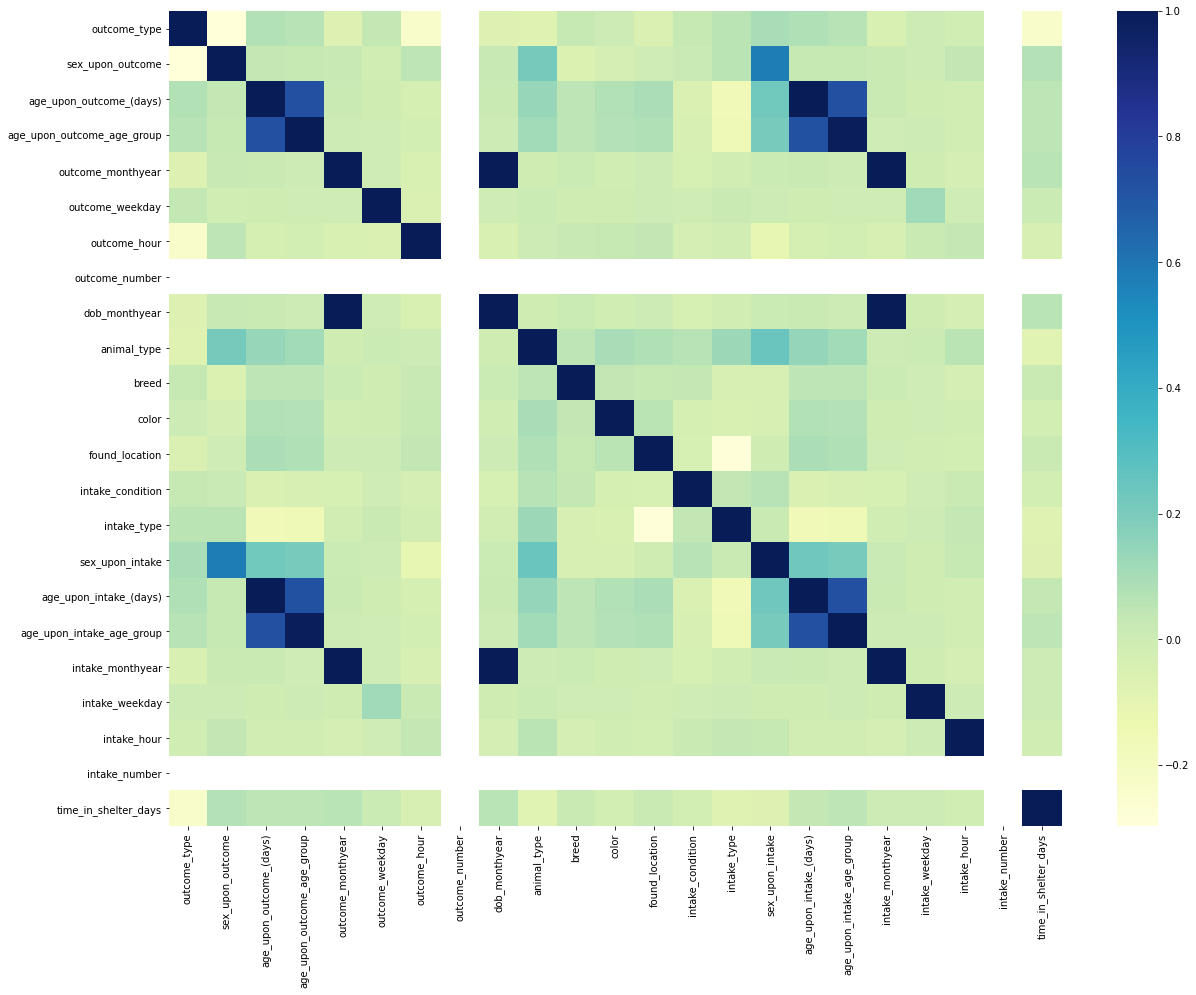

In [77]:
plt.figure(figsize=(20,15))
sns.heatmap(animal_data.corr(), cmap="YlGnBu")
plt.show()

Na heatmapi vidimo da kolone intake_number i outcome_number nisu u korelaciji sa ostalim atributima.

Ove vrednosti predstavljaju koliko je puta životinja uvedena/puštena u/iz skloništa.

In [78]:
animal_data[animal_data['outcome_number'] != 1]

,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_age_group,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_monthyear,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_age_group,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter_days


In [79]:
animal_data[animal_data['intake_number'] != 1]

,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_age_group,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_monthyear,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_age_group,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter_days


Ne postoje vrednosti različite od 1, tako da možemo ukloniti ove 2 kolone.

In [80]:
animal_data = animal_data.drop(['intake_number', 'outcome_number'], axis = 1)

Priprema normalizovanog dataseta:

In [81]:
names = animal_data.columns

In [82]:
scaler = preprocessing.MinMaxScaler()

In [83]:
animal_data_narray = scaler.fit_transform(animal_data)
animal_data_normalized = pd.DataFrame(animal_data_narray, columns=names)

In [84]:
animal_data_normalized.head()

,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_age_group,outcome_monthyear,outcome_weekday,outcome_hour,dob_monthyear,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),age_upon_intake_age_group,intake_monthyear,intake_weekday,intake_hour,time_in_shelter_days
0,0.75,0.50,0.40,1.000000,0.925926,0.666667,0.000000,0.925926,0.666667,0.920149,0.998106,0.753478,0.428571,0.75,0.50,0.40,1.000000,0.943396,0.666667,0.608696,0.000366
1,1.00,0.50,0.40,1.000000,0.111111,0.166667,0.652174,0.111111,0.666667,0.385330,0.850379,0.713234,0.428571,0.25,0.50,0.40,1.000000,0.113208,1.000000,0.652174,0.003094
2,0.75,0.50,0.64,0.333333,0.018519,0.333333,0.478261,0.018519,0.666667,0.872795,0.346591,0.091828,0.285714,0.50,0.50,0.64,0.333333,0.018868,0.333333,0.391304,0.000074
3,0.75,0.75,0.60,0.222222,0.018519,0.500000,0.478261,0.018519,0.666667,0.620706,0.111742,0.713234,0.000000,0.75,0.75,0.60,0.222222,0.018868,0.333333,0.608696,0.000542
4,0.75,0.00,0.60,0.222222,0.240741,0.000000,0.826087,0.240741,0.666667,0.690808,0.089015,0.828880,0.428571,0.75,0.00,0.60,0.222222,0.245283,0.000000,0.652174,0.000111


### Algoritmi

In [85]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import OPTICS

In [86]:
from warnings import filterwarnings
filterwarnings('ignore')

In [96]:
from sklearn.decomposition import PCA

In [113]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [140]:
import scipy.cluster.hierarchy as sch

Redukcija dimenzionalnosti:

In [87]:
animal_data_x_array = np.array(animal_data_normalized.drop(['outcome_type'], axis = 1))
animal_data_y_array = np.array(animal_data['outcome_type'])

In [97]:
animal_data_x_array.shape

(71961, 20)

In [98]:
pca = PCA(n_components = 20, random_state=42)
pca.fit(animal_data_x_array)
animal_data_x_array_pca = pca.transform(animal_data_x_array)

In [99]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 19.69107789,  37.44238455,  48.99029592,  58.93111616,
        66.83455281,  74.68486585,  81.22098606,  85.14106643,
        88.58429459,  91.75669178,  94.15539991,  96.1828701 ,
        97.65002161,  98.93263549,  99.85120531,  99.92332198,
        99.98267856,  99.99909066, 100.        , 100.        ])

Text(0, 0.5, 'Explained variance')

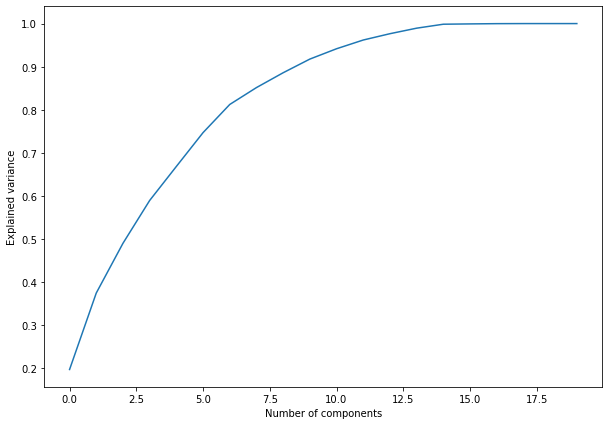

In [100]:
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")

In [101]:
pca_95 = PCA(n_components = 0.95, random_state=42)
pca_95.fit(animal_data_x_array)
animal_data_x_array_pca_95 = pca_95.transform(animal_data_x_array)

In [102]:
animal_data_x_array_pca_95.shape

(71961, 12)

In [104]:
np.cumsum(pca_95.explained_variance_ratio_ * 100)

array([19.69107789, 37.44238455, 48.99029592, 58.93111616, 66.83455281,
       74.68486585, 81.22098606, 85.14106643, 88.58429459, 91.75669178,
       94.15539991, 96.1828701 ])

### KMeans

In [103]:
animal_data['outcome_type'].unique().size

9

In [116]:
sil_array = []
chs_array = []
ssd_array = []
k_range = 10
for k in range(2, k_range):
    k_means = KMeans(n_clusters = k, random_state=0, n_jobs=-1).fit(animal_data_x_array_pca_95)
    sil_array.append(silhouette_score(animal_data_x_array_pca_95, k_means.labels_, metric = "euclidean"))
    chs_array.append(calinski_harabasz_score(animal_data_x_array_pca_95, k_means.labels_))
    ssd_array.append(k_means.inertia_)

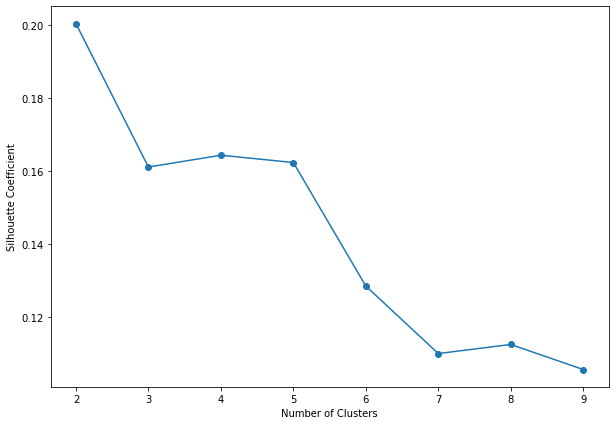

In [117]:
plt.figure(figsize=(10, 7))
plt.plot(range(2, 10), sil_array, 'o-')
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

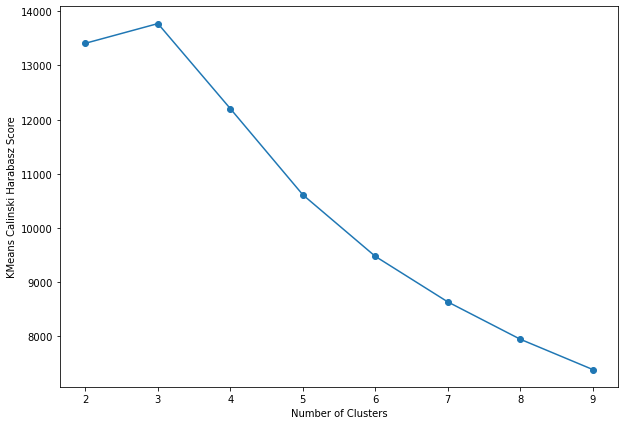

In [118]:
plt.figure(figsize=(10, 7))
plt.plot(range(2, 10), chs_array, 'o-')
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("KMeans Calinski Harabasz Score")
plt.show()

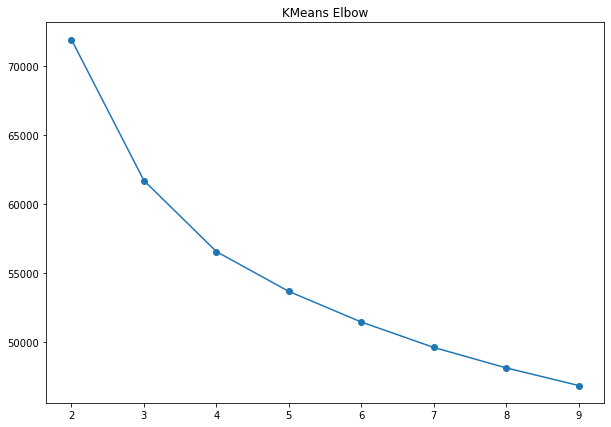

In [121]:
plt.figure(figsize=(10, 7))
plt.plot(range(2, 10), ssd_array, 'o-')
plt.xticks(range(2, 10))
plt.title("KMeans Elbow")
plt.show()

### DBSCAN

In [134]:
sil_array = []
chs_array = []
d_range = 10
for k in range(1, d_range):
    dbscan = DBSCAN(min_samples = k, n_jobs=-1).fit(animal_data_x_array_pca_95)   
    sil_array.append(silhouette_score(animal_data_x_array_pca_95, dbscan.labels_))
    chs_array.append(calinski_harabasz_score(animal_data_x_array_pca_95, dbscan.labels_))

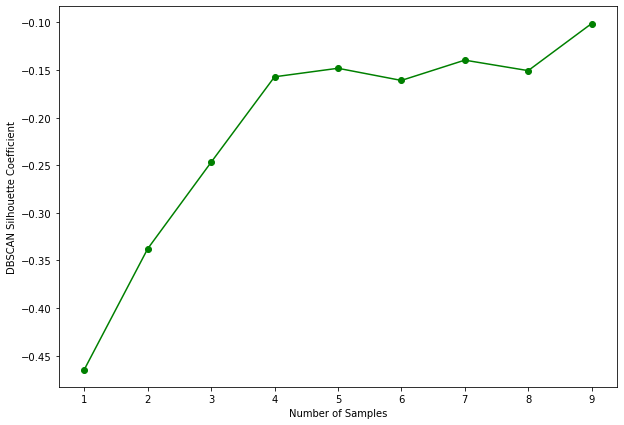

In [136]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 10), sil_array, 'go-')
plt.xticks(range(1, 10))
plt.xlabel("Number of Samples")
plt.ylabel("DBSCAN Silhouette Coefficient")
plt.show()

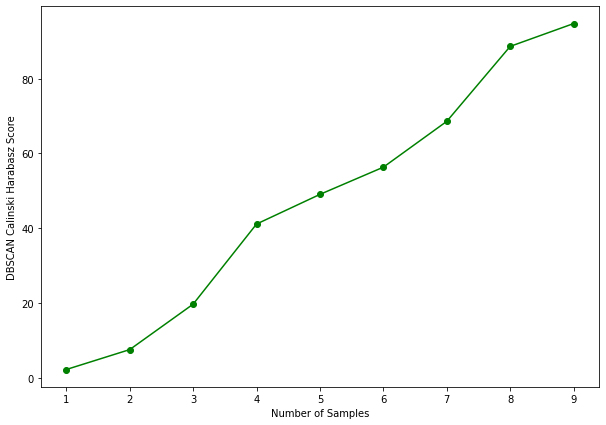

In [137]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 10), chs_array, 'go-')
plt.xticks(range(1, 10))
plt.xlabel("Number of Samples")
plt.ylabel("DBSCAN Calinski Harabasz Score")
plt.show()

### Agglomerative Clustering

Za ovaj algoritam dataset je preveliki, moramo ga smanjiti.

In [142]:
silced_animal_data_x_array_pca_95 = animal_data_x_array_pca_95[:1000]

In [143]:
silced_animal_data_x_array_pca_95.shape

(1000, 12)

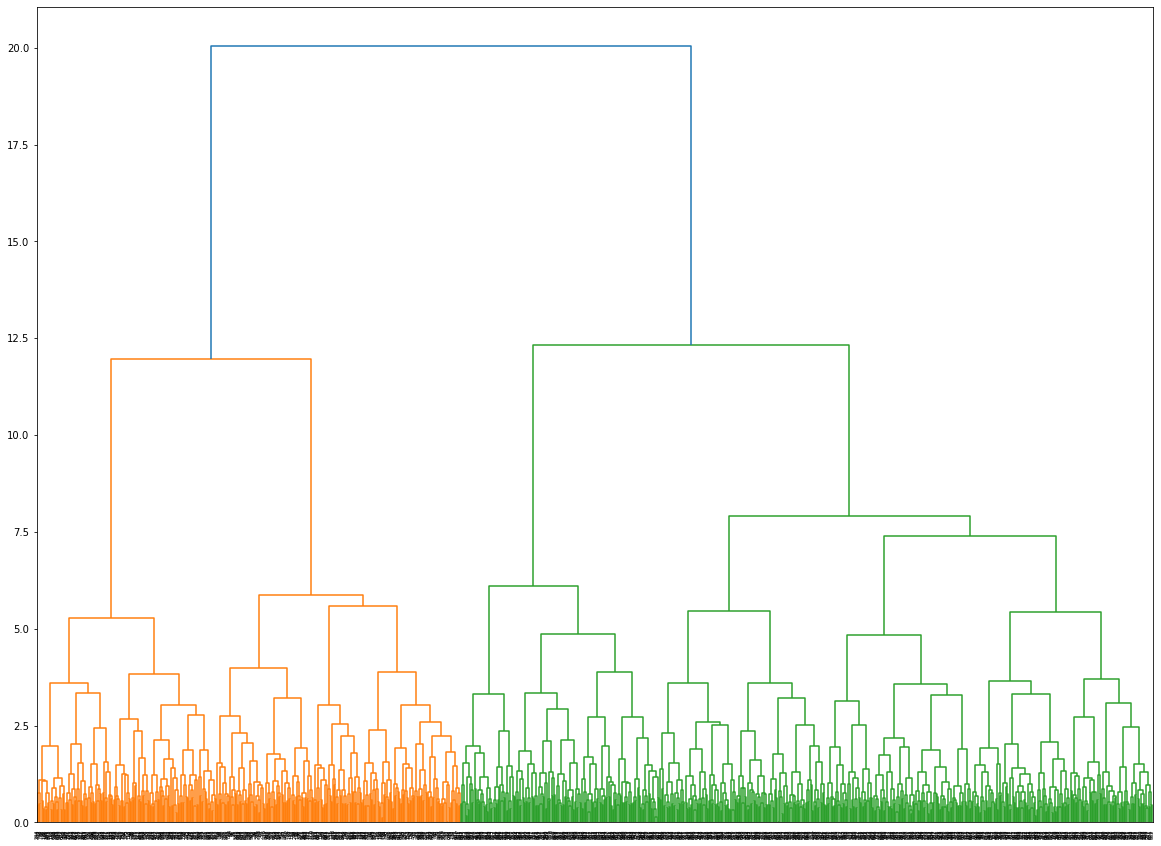

In [144]:
plt.figure(figsize=(20,15))
sch.dendrogram(sch.linkage(silced_animal_data_x_array_pca_95, method = "ward"))
plt.show()

In [146]:
sil_array = []
chs_array = []
a_range = 10
for k in range(2, a_range):
    hcluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(silced_animal_data_x_array_pca_95)
    sil_array.append(silhouette_score(silced_animal_data_x_array_pca_95, hcluster.labels_, metric = "euclidean"))
    chs_array.append(calinski_harabasz_score(silced_animal_data_x_array_pca_95, hcluster.labels_))

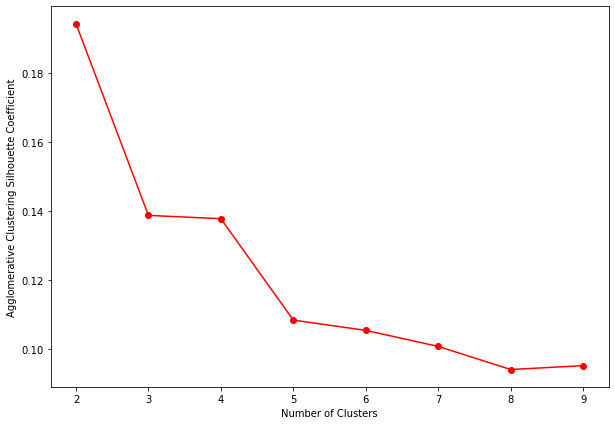

In [147]:
plt.figure(figsize=(10, 7))
plt.plot(range(2, 10), sil_array, 'ro-')
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Agglomerative Clustering Silhouette Coefficient")
plt.show()

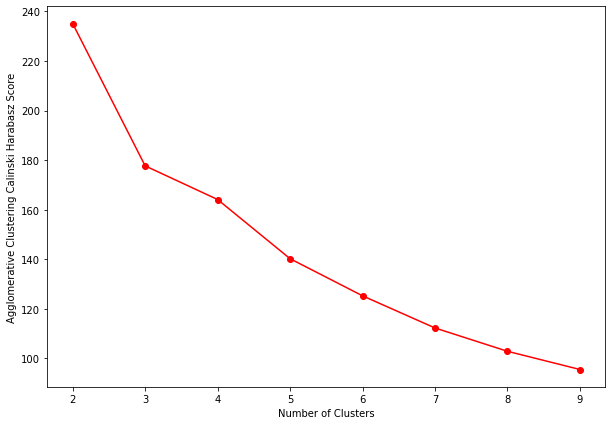

In [148]:
plt.figure(figsize=(10, 7))
plt.plot(range(2, 10), chs_array, 'ro-')
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Agglomerative Clustering Calinski Harabasz Score")
plt.show()